## **Cargamos las librerias necesarias**

In [ ]:
# Limpio Cache
%load_ext autoreload
%autoreload 2

# Directorio raiz
import sys
sys.path.append("..")

from src.data.load_data import descargar_datos_mensuales, preprocess, evaluar_modelo_por_mes, preprocess_2, cargar_y_combinar_datos

from src import os, joblib, plt, pd, sns

from src.features.features import numeric_feat, categorical_feat, features, EPS, target_col, año, meses, ruta_guardado, ruta_datos_comb, ruta_guarda_modelo

### **Comportamiento Mes a Mes del análisis**

Para esto es necesario realizar los siguientes pasos : 

- #### 1. Descarga de Datos por Mes
Se descargan los archivos dedatos correspondientes mes a mes del año 2020. Para análizar y evaluar el modelo específico para cada periodo temporal.

 - #### 2. Evaluación del Modelo por Mes
Se evalúa el rendimiento del modelo utilizando los datos de cada mes mediante el uso de métricas como el F1-score, precisión, recall y exactitud.

- #### 3. Análisis Comparativo
Se compararán las métricas de rendimiento del modelo para cada mes para identificar variaciones en el desempeño. Además se analizarán las características y patrones de los datos de cada mes para entender las razones detrás de las diferencias en el rendimiento.

- #### 4. Conclusión
*Se compararán cuáles características son más influyentes en cada mes y como cambian las importancias de las características a lo largo de los meses para entender mejor las dinámicas subyacentes en los datos y cómo estas afectan el modelo.


In [2]:
# Descargar los datos
descargar_datos_mensuales(año, meses, ruta_guardado)

Datos de 2020-01 descargados y guardados en ../data/raw/yellow_tripdata_2020-01.parquet
Datos de 2020-02 descargados y guardados en ../data/raw/yellow_tripdata_2020-02.parquet
Datos de 2020-03 descargados y guardados en ../data/raw/yellow_tripdata_2020-03.parquet
Datos de 2020-04 descargados y guardados en ../data/raw/yellow_tripdata_2020-04.parquet
Datos de 2020-05 descargados y guardados en ../data/raw/yellow_tripdata_2020-05.parquet
Datos de 2020-06 descargados y guardados en ../data/raw/yellow_tripdata_2020-06.parquet
Datos de 2020-07 descargados y guardados en ../data/raw/yellow_tripdata_2020-07.parquet
Datos de 2020-08 descargados y guardados en ../data/raw/yellow_tripdata_2020-08.parquet
Datos de 2020-09 descargados y guardados en ../data/raw/yellow_tripdata_2020-09.parquet
Datos de 2020-10 descargados y guardados en ../data/raw/yellow_tripdata_2020-10.parquet
Datos de 2020-11 descargados y guardados en ../data/raw/yellow_tripdata_2020-11.parquet
Datos de 2020-12 descargados y g

In [3]:
# Cargar y combinar los datos
combined_data = cargar_y_combinar_datos(año, meses, ruta_guardado, target_col)

# Guardar el DataFrame combinado para uso posterior
ruta_combined_guardado = os.path.join(ruta_guardado, ruta_datos_comb)
combined_data.to_parquet(ruta_combined_guardado)

print(f"Datos combinados guardados en '{ruta_combined_guardado}'")

c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-01 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-02 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-03 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-04 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-05 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-06 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-07 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-08 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-09 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-10 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-11 cargados y combinados.


c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\fpsju\OneDrive\Documentos\ML_TaxiNy_Tarea1\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype("int32")


Datos de 2020-12 cargados y combinados.
Datos combinados guardados en '../data/raw/datos_taxi_combinados_2020.parquet'


In [4]:
loaded_rfc = joblib.load(ruta_guarda_modelo)

In [5]:
# Evaluar el modelo
resultados = evaluar_modelo_por_mes(año, meses, ruta_guardado, loaded_rfc, features, target_col,EPS)

# Convertir los resultados a un DataFrame para análisis adicional
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

2020-01 -> F1: 0.3758745252300771, Precisión: 0.6215049867257515, Recall: 0.26940184753468255, Exactitud: 0.4948863830423256
2020-02 -> F1: 0.3533344367361345, Precisión: 0.6262061877821977, Recall: 0.2460968077239957, Exactitud: 0.4833571085132775
2020-03 -> F1: 0.3840758486011417, Precisión: 0.6158725711619966, Recall: 0.2790496036023089, Exactitud: 0.5010007154405969
2020-04 -> F1: 0.5186746282636694, Precisión: 0.5285628320053121, Recall: 0.5091496017349764, Exactitud: 0.6003862880423987
2020-05 -> F1: 0.4983292501548452, Precisión: 0.5185811642992035, Recall: 0.47959966284199895, Exactitud: 0.6331258006070188
2020-06 -> F1: 0.4744549802959815, Precisión: 0.5530653107319974, Recall: 0.4154103372112559, Exactitud: 0.5893190550121333
2020-07 -> F1: 0.47386672448913375, Precisión: 0.5695398756667504, Recall: 0.40571363526723886, Exactitud: 0.5825671253450133
2020-08 -> F1: 0.4629704145583309, Precisión: 0.5859641081466486, Recall: 0.3826518946558856, Exactitud: 0.5737049724903976
2020

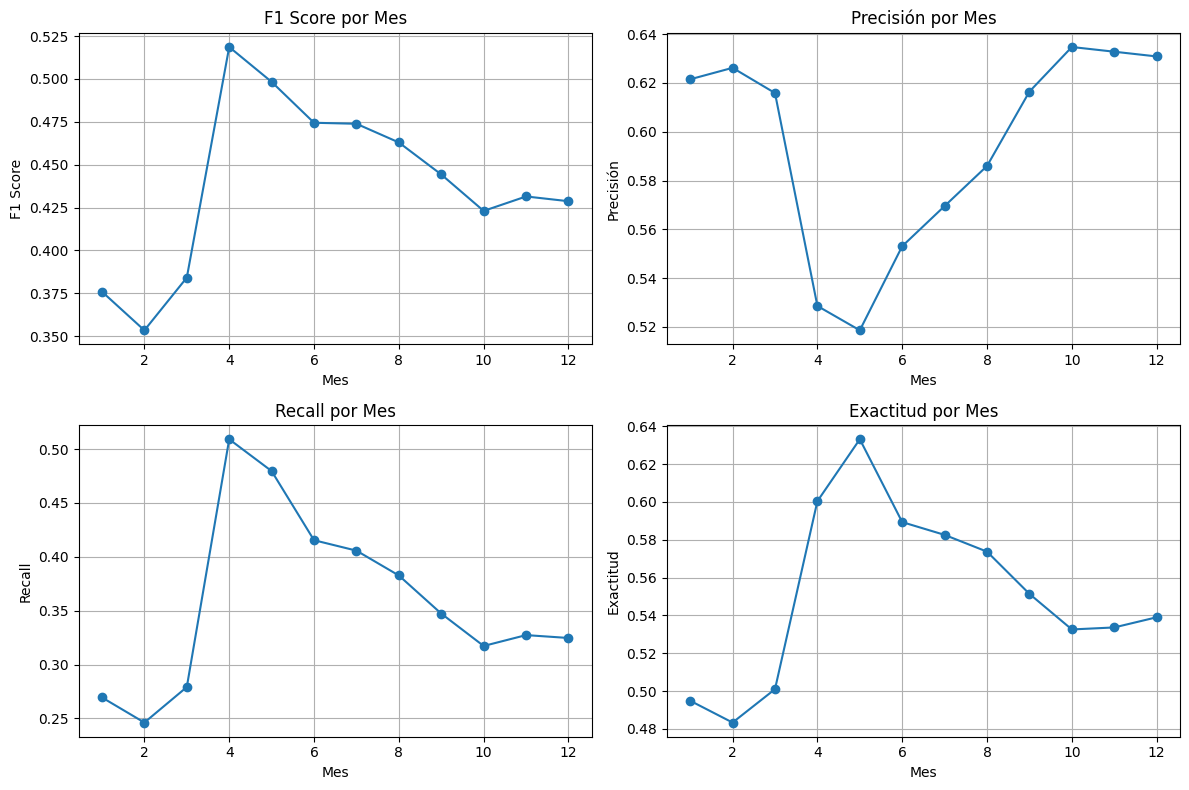

In [6]:
# Plotting the metrics for each month
plt.figure(figsize=(12, 8))

# F1 Score
plt.subplot(2, 2, 1)
plt.plot(resultados_df['mes'], resultados_df['f1_score'], marker='o')
plt.title('F1 Score por Mes')
plt.xlabel('Mes')
plt.ylabel('F1 Score')
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(resultados_df['mes'], resultados_df['precision'], marker='o')
plt.title('Precisión por Mes')
plt.xlabel('Mes')
plt.ylabel('Precisión')
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(resultados_df['mes'], resultados_df['recall'], marker='o')
plt.title('Recall por Mes')
plt.xlabel('Mes')
plt.ylabel('Recall')
plt.grid(True)

# Accuracy
plt.subplot(2, 2, 4)
plt.plot(resultados_df['mes'], resultados_df['accuracy'], marker='o')
plt.title('Exactitud por Mes')
plt.xlabel('Mes')
plt.ylabel('Exactitud')
plt.grid(True)

plt.tight_layout()
plt.show()


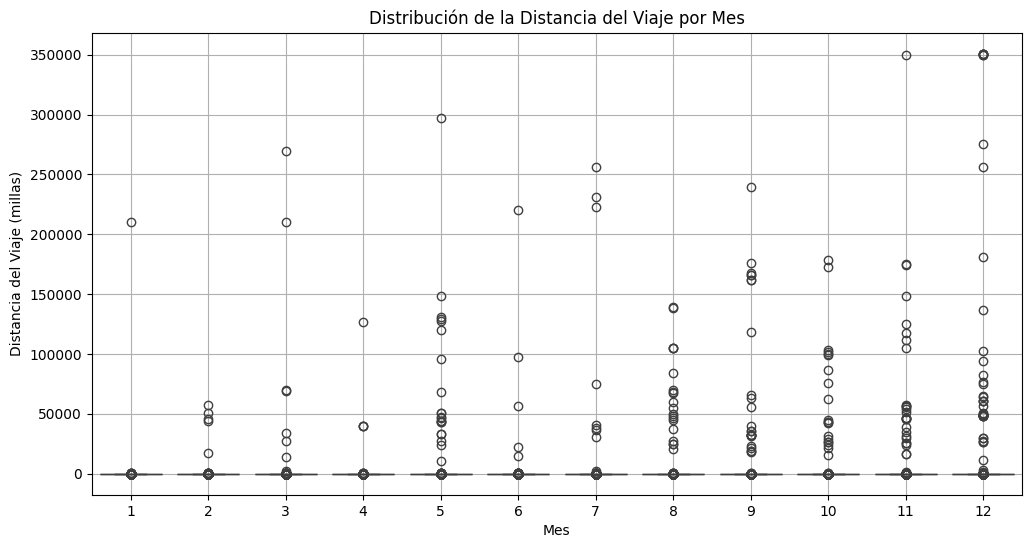

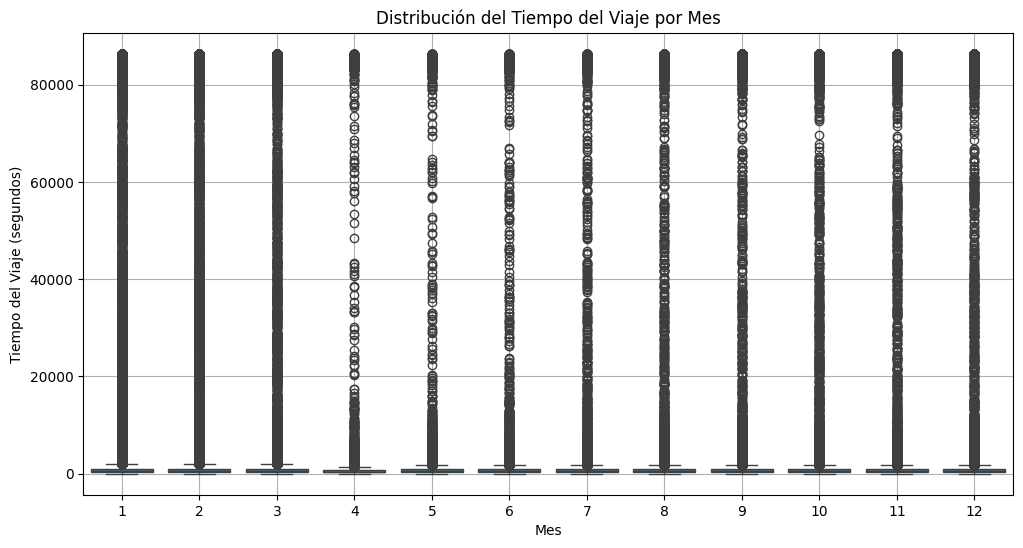

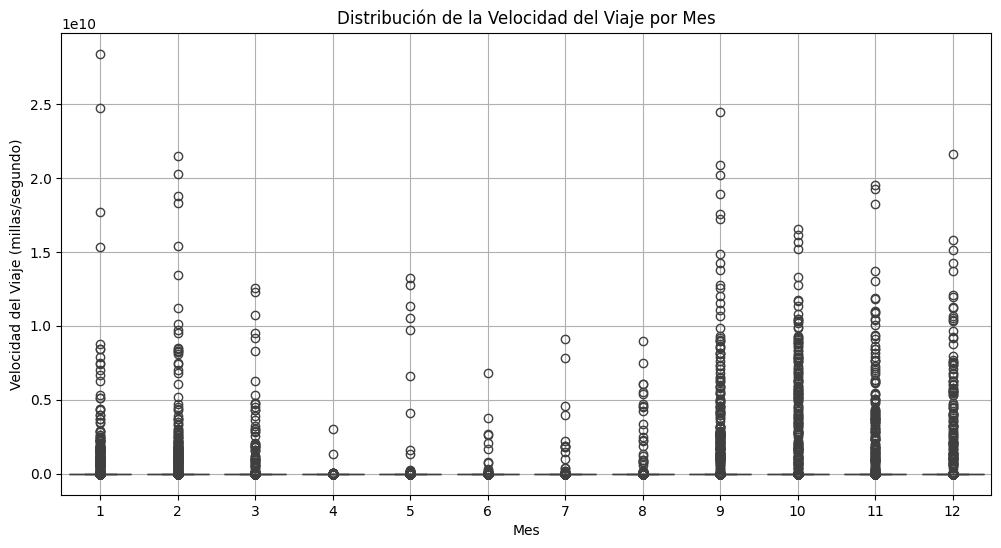

In [7]:
# Graficar la distribución de la distancia del viaje por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='trip_distance', data=combined_data)
plt.title('Distribución de la Distancia del Viaje por Mes')
plt.xlabel('Mes')
plt.ylabel('Distancia del Viaje (millas)')
plt.grid(True)
plt.show()

# Graficar la distribución del tiempo del viaje por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='trip_time', data=combined_data)
plt.title('Distribución del Tiempo del Viaje por Mes')
plt.xlabel('Mes')
plt.ylabel('Tiempo del Viaje (segundos)')
plt.grid(True)
plt.show()

# Graficar la distribución de la velocidad del viaje por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='trip_speed', data=combined_data)
plt.title('Distribución de la Velocidad del Viaje por Mes')
plt.xlabel('Mes')
plt.ylabel('Velocidad del Viaje (millas/segundo)')
plt.grid(True)
plt.show()


## **Conclusión**

#### Rendimiento del Modelo por Mes
El rendimiento del modelo, medido a través de métricas como F1-score, precisión, recall y exactitud, muestra variaciones significativas a lo largo de los meses. Estos cambios reflejan la capacidad del modelo para predecir propinas altas en diferentes periodos del año.

#### Explicación con Distribuciones de Características
Los gráficos de distribución de características proporcionan información sobre las razones detrás de las variaciones en el rendimiento del modelo.

1. **Distribución de la Distancia del Viaje**:
   La variabilidad en la distancia de los viajes a lo largo de los meses puede influir en la capacidad del modelo para predecir propinas. Meses con viajes más cortos o más largos de lo habitual pueden afectar la precisión del modelo.

2. **Distribución del Tiempo del Viaje**:
   El tiempo del viaje muestra una amplia variabilidad, con ciertos meses teniendo tiempos de viaje más largos. Esto puede impactar el rendimiento del modelo, especialmente en meses donde el tráfico u otros factores externos influyen significativamente en la duración de los viajes.

3. **Distribución de la Velocidad del Viaje**:
   La velocidad del viaje también varía considerablemente entre los meses. Meses con velocidades promedio más altas o bajas pueden indicar condiciones de tráfico o comportamientos de los usuarios que afectan la predicción de propinas.

En resumen, las variaciones en el rendimiento del modelo pueden explicarse en parte por los cambios en las características clave de los datos a lo largo del año. Estos gráficos de distribución destacan cómo factores como la distancia, el tiempo y la velocidad del viaje influyen en la capacidad del modelo para predecir propinas altas, subrayando la importancia de considerar estos elementos al ajustar y mejorar el modelo para diferentes contextos temporales.
